In [ ]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Lee' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
conda install -c conda-forge praw


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: praw


In [ ]:
import praw

reddit = praw.Reddit(client_id='', client_secret='', user_agent='')

1) what are your opinions on people who vape/smoke?

In [ ]:
submission = reddit.submission(url="https://www.reddit.com/r/askSingapore/comments/ww1nah/what_are_your_opinions_on_people_who_vapesmoke/")

In [ ]:
from praw.models import MoreComments

post_comments = []

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
        
    post_comments.append(top_level_comment.body)
    

print(post_comments)

["It's their life. As long as they smoke in designated areas and not around non-smokers I don't really care.", "Idc as long as they don't do it near me. Say no to 2nd hand smoke.", 'Normally it\'s fine, I grew up with a father that smoke and lots of my friend at work and football also smoke. But I especially hate two types of smokers...\n\nFirst are those that rush up to aircon bus or train RIGHT AFFER taking a few puffs from their stick, making the air in the entire bus feel so chocking... This is the same for those that enter aircon libraries or fast food restaurants, etc...\n\nAlso hate those that start smoking the VERY moment they step off the bus, like really immediately. The lighter are already out in their hand even before they scan their translink card. Cannot even wait for a few seconds meh? Must die die start smoking immediately? Smoke nevermind, but they start smoking when under sheltered walkway after leaving the bus, and everyone behind have to take in second hand smoke, t

In [ ]:
import nltk
from nltk.corpus import stopwords
import numpy as np
import re

stopwords_list = {"for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "vapes", "vape", "vaping", "lmao", "i", "are",
                 "is", "know", "known", "has", "been", "were", "was", "with", "have", "could", "not", "too", "it", "so", "can",
                 "you", "that", "this", "but", "at", "my", "just", "that", "what", "if", "as", "they", "be", "all", "its", "me", "thing",
                 "will", "now", "like", "who", "had", "about", "or", "about", "he", "when", "up", "into", "there", "s", "out", "instead",
                 "your", "people", "we", "because", "how", "should", "also", "her", "im", "did", "look", "It", "those", "got", "no", 'i', 
                'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 
                'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 
                'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 
                'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
                'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
                'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
                'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
                'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
                'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 
                'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
                "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
                "won't", 'wouldn', "wouldn't", "smoking", "smokes","smoke", "u", "wanna", "dont", "cant", "really", "around", "much",
                 "even", "lah", "bus", "must", "already", "think", "especially", "say", "non"}

def clean_post_comments(comments):
    if type(comments) == np.float:
        return ""
    temp = comments.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords_list]
    temp = " ".join(word for word in temp)
    return temp

In [ ]:
opinions_on_vapes = [clean_post_comments(comments) for comments in post_comments]
opinions_on_vapes

<ipython-input-21-4b98c6db42c6>:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(comments) == np.float:


['life long designated areas smokers care',
 'idc long near 2nd hand',
 'normally fine grew father lots friend work football hate two types smokers first rush aircon train right affer taking puffs stick making air entire feel chocking enter aircon libraries fast food restaurants etc hate start moment step immediately lighter hand scan translink card cannot wait seconds meh die die start immediately nevermind start sheltered walkway leaving everyone behind take second hand get trapped due shelter continued walking shelter thinks point face side blow helping bullshit god damn bloody irritating leh want take transport wait couple minutes finished means take next take next force entire breath second half exhaled patient keen die meh stepped straight away moment stepped ground lighter stick click click bothered step side step easily addicted bad ask well die straight away drag us',
 'fine irritating irresponsible 1 make mess throw cigarettes butts anyhow properly dispose 2 sensitive surroun

In [ ]:
opinions_on_vapes_longtext = " ".join(text for text in opinions_on_vapes)
opinions_on_vapes_longtext

'life long designated areas smokers care idc long near 2nd hand normally fine grew father lots friend work football hate two types smokers first rush aircon train right affer taking puffs stick making air entire feel chocking enter aircon libraries fast food restaurants etc hate start moment step immediately lighter hand scan translink card cannot wait seconds meh die die start immediately nevermind start sheltered walkway leaving everyone behind take second hand get trapped due shelter continued walking shelter thinks point face side blow helping bullshit god damn bloody irritating leh want take transport wait couple minutes finished means take next take next force entire breath second half exhaled patient keen die meh stepped straight away moment stepped ground lighter stick click click bothered step side step easily addicted bad ask well die straight away drag us fine irritating irresponsible 1 make mess throw cigarettes butts anyhow properly dispose 2 sensitive surroundings e child

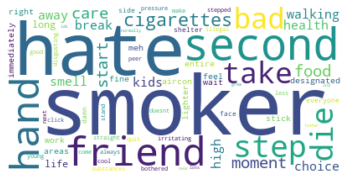

In [ ]:
# Generate a word cloud image
# Import libraries required for WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=stopwords_list, max_words=70, background_color="white").generate(opinions_on_vapes_longtext)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("Opinions on vaping.png")

2) How is Vaping perceived by Singaporeans?

In [ ]:
submission = reddit.submission(url="https://www.reddit.com/r/singapore/comments/jbbps4/how_is_vaping_perceived_by_singaporeans/")

In [ ]:
from praw.models import MoreComments

post_comments = []

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
        
    post_comments.append(top_level_comment.body)
    

print(post_comments)

["long time lurker. could get bashed.\n\nIf not current smoker, don't vape. \n\nI think the key is harm reduction. if there is a habit of inhaling and exhaling, doing it the least harmful way would be ideal.", 'Purely personal opinion, I don’t like how vaping increases the proliferation of nicotine into the youth demographic by making it “approachable”, “cool”, or “not as harmful as smoking”. I was in the UK when vaping got more and more ubiquitous, and then I see younger and younger kids vaping. Not cool.', "Tbh, many of my ex-smoker (overseas) friends stop smoking and some even totally off any nicotine products thanks to vape/e-cigg. I am one such example, on daily basis, I'm have no interaction with nicotine now. \n\nOn the other hand, I do agree with the regulating in SG as they need to find a proper means to control distribution and fully understand the long-term health risk. I have also seen non-smoker friends who suddenly become heavy vape/e-cigg users. With vape, I feel the eff

In [ ]:
import nltk
from nltk.corpus import stopwords
import numpy as np
import re

stopwords_list = {"for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "vapes", "vape", "vaping", "lmao", "i", "are",
                 "is", "know", "known", "has", "been", "were", "was", "with", "have", "could", "not", "too", "it", "so", "can",
                 "you", "that", "this", "but", "at", "my", "just", "that", "what", "if", "as", "they", "be", "all", "its", "me", "thing",
                 "will", "now", "like", "who", "had", "about", "or", "about", "he", "when", "up", "into", "there", "s", "out", "instead",
                 "your", "people", "we", "because", "how", "should", "also", "her", "im", "did", "look", "It", "those", "got", "no", 'i', 
                'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 
                'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 
                'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 
                'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
                'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
                'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
                'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
                'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
                'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 
                'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
                "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
                "won't", 'wouldn', "wouldn't", "smoking", "smokes","smoke", "u", "wanna", "dont", "cant", "really", "around", "much",
                 "even", "lah", "bus", "must", "already", "tbh", "think", "get", "would", "youll", "one", "cannot", "take", "way", "thanks",
                 "sg", "anything", "e", "want", "doesnt"}

def clean_post_comments(comments):
    if type(comments) == np.float:
        return ""
    temp = comments.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords_list]
    temp = " ".join(word for word in temp)
    return temp

In [ ]:
perception_on_vapes = [clean_post_comments(comments) for comments in post_comments]
perception_on_vapes

<ipython-input-49-619b2710785f>:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(comments) == np.float:


['long time lurker bashed current smoker key harm reduction habit inhaling exhaling least harmful ideal',
 'purely personal opinion increases proliferation nicotine youth demographic making approachable cool harmful uk ubiquitous see younger younger kids cool',
 'many ex smoker overseas friends stop totally nicotine products cigg example daily basis interaction nicotine hand agree regulating need find proper means control distribution fully understand long term health risk seen non smoker friends suddenly become heavy cigg users feel effects lungs faster cig sometimes terrifying hence gradually cut zero disclaimer narcs ban usage',
 'nice try ica',
 'sit back relx bro',
 'ex smoker contraband cigarettes easily obtainable illegal 99 time consumer fine planning peddle thats whole new level risk added edit trying advocate theres reason singapore prohibits never alchemic brew still considered new product unlike cigarette tobacco industry generations alot harmful ones takes time study prove

In [ ]:
perception_on_vapes_longtext = " ".join(text for text in perception_on_vapes)
perception_on_vapes_longtext

'long time lurker bashed current smoker key harm reduction habit inhaling exhaling least harmful ideal purely personal opinion increases proliferation nicotine youth demographic making approachable cool harmful uk ubiquitous see younger younger kids cool many ex smoker overseas friends stop totally nicotine products cigg example daily basis interaction nicotine hand agree regulating need find proper means control distribution fully understand long term health risk seen non smoker friends suddenly become heavy cigg users feel effects lungs faster cig sometimes terrifying hence gradually cut zero disclaimer narcs ban usage nice try ica sit back relx bro ex smoker contraband cigarettes easily obtainable illegal 99 time consumer fine planning peddle thats whole new level risk added edit trying advocate theres reason singapore prohibits never alchemic brew still considered new product unlike cigarette tobacco industry generations alot harmful ones takes time study prove regulate smell bad n

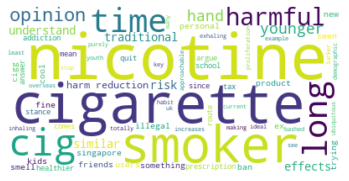

In [ ]:
# Generate a word cloud image
# Import libraries required for WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=stopwords_list, max_words=70, background_color="white").generate(perception_on_vapes_longtext)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("Perception on vaping.png")